In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings 
warnings.filterwarnings("ignore")

In [2]:
leads=pd.read_csv("Leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
leads=leads.replace('Select',np.nan)

In [8]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#Represents there arent any duplicates in the data set
sum(leads.duplicated())

0

In [10]:
(leads.isnull().sum()/len(leads.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# Deleting Columns with NUll values greater than 40%
#Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Profile,              
#    Lead Quality,How did you hear about X Education                   
                   
leads=leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education'],axis=1)

In [12]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
# Since both are Unique Id columns we can drop them
leads[['Prospect ID','Lead Number']]

,Prospect ID,Lead Number
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,3256f628-e534-4826-9d63-4a8b88782852,660681
...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538


In [14]:
leads=leads.drop(['Lead Number'],axis=1)

In [15]:
leads.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
counts=pd.DataFrame(leads.nunique())

In [17]:
counts

,0
Prospect ID,9240
Lead Origin,5
Lead Source,21
Do Not Email,2
Do Not Call,2
Converted,2
TotalVisits,41
Total Time Spent on Website,1731
Page Views Per Visit,114
Last Activity,17


In [18]:
# Columns have unique entries, these can be dropped
leads=leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [19]:
# Country Column has more of "India" as entry, we can drop that , while "Tags" column has nothing to do with ML Model,
# while 'What matters most to you in choosing a course' has mojority of single option entry which is of no use for ML Model
leads=leads.drop(['Country','Tags','What matters most to you in choosing a course'],axis=1)

In [20]:
#Check for Null Percentage for imputation of Null Values with Mean or Median
leads.isnull().sum()/len(leads.index)*100

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Do Not Call                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            36.580087
What is your current occupation           29.112554
Search                                     0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Recommendations                    0.000000
City                                      39.707792
A free copy 

In [21]:
# Imputing frequently entered value for Categorical Variables
leads["Lead Source"].fillna('Google',inplace=True)
leads["Last Activity"].fillna('Email Opened',inplace=True)
leads["Specialization"].fillna('Finance Management',inplace=True)
leads["What is your current occupation"].fillna('Unemployed',inplace=True)
leads["City"].fillna('Mumbai',inplace=True)

In [22]:
leads['TotalVisits'].skew() # This shows the column is highly skewed with skew value of 19.91
# We can replace missing values with 'Median'

19.911657340056212

In [23]:
leads['TotalVisits'].fillna(leads['TotalVisits'].median(),inplace=True)

In [24]:
leads['Page Views Per Visit'].skew() # This shows this column in also skewed with skew value of 2.87
# We can replace missing value with 'Median'

2.871792896566408

In [25]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(),inplace=True)

In [26]:
leads.isnull().sum()

Prospect ID                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [27]:
correlation=leads.corr()

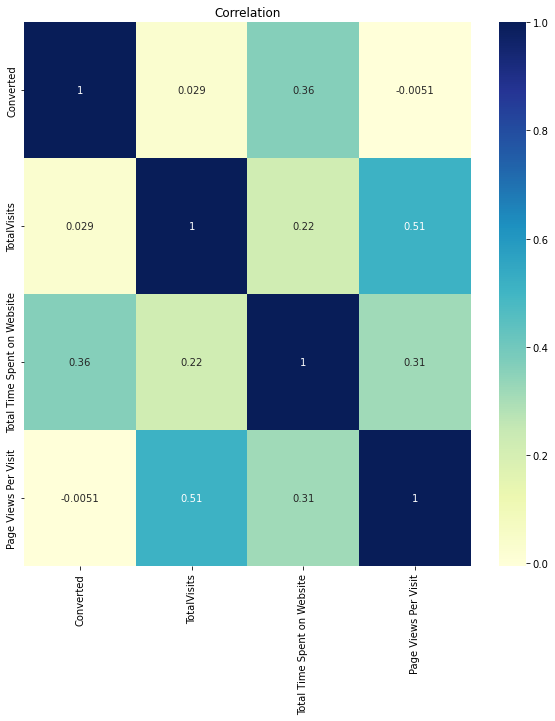

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.title("Correlation")
plt.show()

In [29]:
df=pd.DataFrame(leads[['Do Not Email','Do Not Call','Converted','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']].value_counts())
df

0
Do Not Email Do Not Call Converted Search Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations A free copy of Mastering The Interview      
No           No          0         No     No                No                 No        No                    No                      No                                      3462
                         1         No     No                No                 No        No                    No                      No                                      2431
                         0         No     No                No                 No        No                    No                      Yes                                     1589
                         1         No     No                No                 No        No                    No                      Yes                                      999
Yes          No          0         No     No                No                 No        No                    No                      No                                       350
                                                                                                                                       Yes                                      266
                         1         No     No                No                 No        No                    No                      No                                        90
                                                                                                                                       Yes                                       28
No           No          0         Yes    No                No                 No        No                    No                      No                                         6
                         1         Yes    No                No                 No        No                    No                      No                                         3
                                   No     No                No                 No        No                    Yes                     No                                         2
             Yes         1         No     No                No                 No        No                    No                      No                                         2
             No          0         No     No                No                 No        Yes                   No                      No                                         2
                         1         No     No                No                 No        No                    Yes                     Yes                                        2
                         0         Yes    Yes               Yes                No        Yes                   Yes                     Yes                                        1
                                          No                No                 No        No                    Yes                     Yes                                        1
                                                                                                               No                      Yes                                        1
                         1         No     No                No                 No        Yes                   No                      No                                         1
                                          Yes               No                 No        No                    No                      No                                         1
                                   Yes    No                No                 No        No                    No                      Yes                                        1
                                                                                                               Yes                     No                                         1
                         0         No 

In [30]:
# Converting Binary Variables YES/NO to 0/1

variables=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variables
leads[variables] = leads[variables].apply(binary_map)

In [31]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,Unemployed,0,0,0,0,0,0,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,Student,0,0,0,0,0,0,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified


In [32]:
# Clubing lower frequency categories into single category 
leads['Lead Source']=leads['Lead Source'].replace(['bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Others Lead Source')

In [33]:
leads["Last Activity"]=leads["Last Activity"].replace(['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others Last Activity')

In [34]:
leads["What is your current occupation"]=leads["What is your current occupation"].replace(['Other','Housewife','Businessman'],'Other Occupation')

In [35]:
leads["Last Notable Activity"]=leads["Last Notable Activity"].replace(['Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Other Activity')


In [36]:
# Creating Dummy Variables for Categorical Variables -- 
dummy=pd.get_dummies(leads[['Lead Origin','Lead Source',"Last Activity","What is your current occupation","Last Notable Activity",'Specialization','City']], drop_first=True)

In [37]:
# Adding the results to the master dataframe
leads=pd.concat([leads,dummy],axis=1)

In [38]:
leads.head()


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Dropping original Columns
leads=leads.drop(['Lead Origin','Lead Source',"Last Activity","What is your current occupation","Last Notable Activity",'Specialization','City'],axis=1)

In [40]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Do Not Email                                          9240 non-null   int64  
 2   Do Not Call                                           9240 non-null   int64  
 3   Converted                                             9240 non-null   int64  
 4   TotalVisits                                           9240 non-null   float64
 5   Total Time Spent on Website                           9240 non-null   int64  
 6   Page Views Per Visit                                  9240 non-null   float64
 7   Search                                                9240 non-null   int64  
 8   Newspaper Article                                     9240

In [41]:
# Test Train Split
from sklearn.model_selection import train_test_split

In [42]:
X =leads.drop(['Converted','Prospect ID'],axis=1)

In [43]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y =leads['Converted']

In [45]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [47]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] =scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.100767,0.005716,-0.470569,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3516,0,0,0.290067,-0.691418,0.070401,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.290067,1.365219,1.226321,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3934,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
leads.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Do Not Email,1.000000,-0.004322,-0.135580,0.033640,-0.046374,0.033404,-0.011443,-0.004322,-0.003056,-0.003056,...,0.023426,0.028032,0.053781,0.002680,0.059722,0.011458,-0.006096,0.039932,-0.004006,0.045447
Do Not Call,-0.004322,1.000000,0.018581,0.003241,0.006801,-0.005880,-0.000573,-0.000216,-0.000153,-0.000153,...,-0.001539,-0.001313,-0.000970,-0.002915,-0.002205,-0.004167,-0.003356,-0.003047,-0.004380,-0.001322
Converted,-0.135580,0.018581,1.000000,0.029119,0.362483,-0.005068,-0.002261,0.003465,-0.008238,-0.008238,...,-0.009755,0.007200,-0.014956,0.019245,-0.009457,0.009859,0.025513,0.009576,0.039189,-0.008779
TotalVisits,0.033640,0.003241,0.029119,1.000000,0.217341,0.512214,0.049577,0.033775,0.035756,0.014166,...,0.037582,0.058342,0.016234,0.063135,0.064344,0.054664,0.031131,0.043013,0.070816,0.011979
Total Time Spent on Website,-0.046374,0.006801,0.362483,0.217341,1.000000,0.314266,0.012654,0.011326,0.006195,0.025142,...,0.027458,0.020672,0.002900,0.049050,0.042640,0.054251,0.066759,0.051112,0.074099,0.020840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Other Cities,0.011458,-0.004167,0.009859,0.054664,0.054251,0.093022,-0.000418,-0.004167,-0.002946,-0.002946,...,0.030226,0.081974,0.019054,0.021848,0.067389,1.000000,-0.064597,-0.058648,-0.084291,-0.025445
City_Other Cities of Maharashtra,-0.006096,-0.003356,0.025513,0.031131,0.066759,0.082796,-0.008886,-0.003356,-0.002373,-0.002373,...,0.005085,0.064213,0.000165,0.028117,0.013484,-0.064597,1.000000,-0.047240,-0.067896,-0.020496
City_Other Metro Cities,0.039932,-0.003047,0.009576,0.043013,0.051112,0.093594,0.019956,0.034000,0.050236,-0.002155,...,0.004674,0.018454,0.019549,0.047590,0.061909,-0.058648,-0.047240,1.000000,-0.061643,-0.018608
City_Thane & Outskirts,-0.004006,-0.004380,0.039189,0.070816,0.074099,0.089146,-0.011595,-0.004380,-0.003097,-0.003097,...,0.007121,0.009205,0.010518,0.059373,-0.001407,-0.084291,-0.067896,-0.061643,1.000000,-0.026744


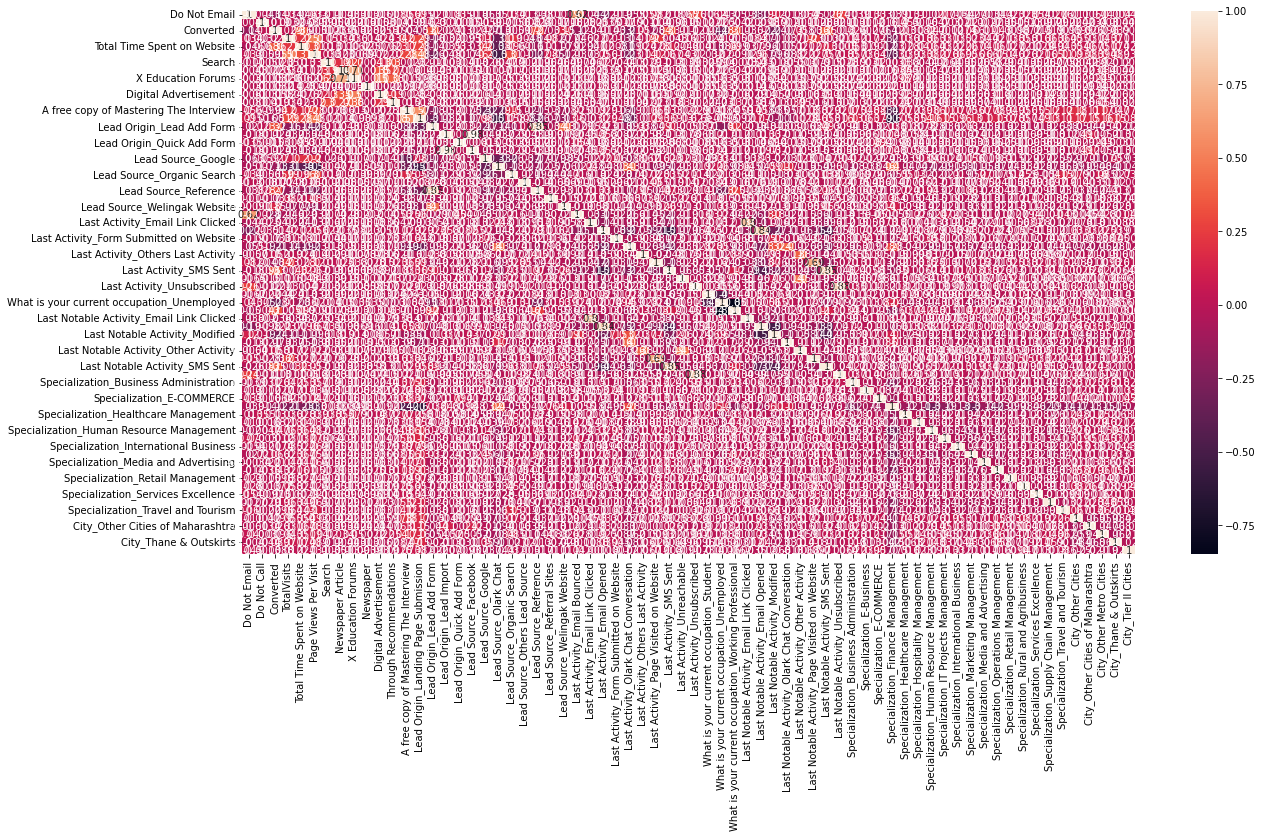

In [50]:
# Plotting Heat Map to check for correlation
plt.figure(figsize = (20,10))     
sns.heatmap(leads.corr(),annot=True)
plt.show()
# No Correlation is seen between Variables

In [51]:
# Model Building
import statsmodels.api as sm

In [52]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.6
Date:                Tue, 21 Mar 2023   Deviance:                       5243.2
Time:                        15:20:34   Pearson chi2:                 7.51e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9902      0.866      1.143      0.253      -0.708       2.688
Do Not Email                                            -1.2129      0.219     -5.526      0.000      -1.643      -0.783
Do Not Call                                             21.9295   3.33e+04      0.001      0.999   -6.53e+04    6.54e+04
TotalVisits                                              0.1870      0.051      3.632      0.000       0.086       0.288
Total Time Spent on Website                              1.0888      0.040     26.958      0.000       1.010       1.168
Page Views Per Visit                                    -0.1508      0.054     -2.776      0.006      -0.257      -0.044
Search                                                   0.5243      0.779      0.673      0.501      -1.002       2.051
Newspaper Article                                       23.8138   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
X Education Forums                                     -25.7951   7.62e+04     -0.000      1.000   -1.49e+05    1.49e+05
Newspaper                                              -23.5487   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -21.5913   3.41e+04     -0.001      0.999   -6.68e+04    6.67e+04
Through Recommendations                                  1.3151      1.380      0.953      0.341      -1.390       4.020
A free copy of Mastering The Interview                  -0.0721      0.108     -0.666      0.506      -0.284       0.140
Lead Origin_Landing Page Submission                     -0.4119      0.119     -3.449      0.001      -0.646      -0.178
Lead Origin_Lead Add Form                                2.8785      0.514      5.598      0.000       1.871       3.886
Lead Origin_Lead Import                                  0.8675      1.668      0.520      0.603      -2.401       4.136
Lead Origin_Quick Add Form                              21.9994   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                    -0.9304      1.670     -0.557      0.577      -4.203       2.342
Lead Source_Google                                       0.3612      0.115      3.144      0.002       0.136       0.586
Lead Source_Olark Chat                                   1.1765      0.162      7.262      0.000       0.859       1.494
Lead Source_Organic Search                               0.1637      0.132      1.236      0.217      -0.096       0.423
Lead Source_Others Lead Source                           0.4207      0.593      0.709      0.478      -0.742       1.583
Lead Source_Reference                                    0

In [53]:
# Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [55]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False,  True, False,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Search', False, 20),
 ('Newspaper Article', False, 11),
 ('X Education Forums', False, 26),
 ('Newspaper', False, 3),
 ('Digital Advertisement', False, 5),
 ('Through Recommendations', False, 14),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 47),
 ('Lead Origin_Quick Add Form', False, 18),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Others Lead Source', False, 22),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email L

In [57]:
col = X_train.columns[rfe.support_]

In [58]:
# Assessing the model with stats models
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.8
Date:                Tue, 21 Mar 2023   Deviance:                       5381.6
Time:                        15:21:39   Pearson chi2:                 7.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3918
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2619      0.537     -0.488      0.625      -1.314       0.790
Do Not Email                                            -1.0620      0.171     -6.207      0.000      -1.397      -0.727
Total Time Spent on Website                              1.1055      0.040     27.958      0.000       1.028       1.183
Lead Origin_Lead Add Form                                3.7294      0.191     19.514      0.000       3.355       4.104
Lead Source_Olark Chat                                   1.0836      0.100     10.888      0.000       0.889       1.279
Lead Source_Welingak Website                             1.8936      0.744      2.547      0.011       0.436       3.351
Last Activity_Email Opened                               0.4797      0.107      4.480      0.000       0.270       0.690
Last Activity_Others Last Activity                       1.7276      0.526      3.285      0.001       0.697       2.758
Last Activity_SMS Sent                                   1.6264      0.107     15.187      0.000       1.417       1.836
What is your current occupation_Student                 -1.0005      0.579     -1.729      0.084      -2.135       0.134
What is your current occupation_Unemployed              -1.3617      0.531     -2.562      0.010      -2.403      -0.320
What is your current occupation_Working Professional     1.4765      0.561      2.632      0.008       0.377       2.576
Last Notable Activity_Modified                          -0.8643      0.087     -9.950      0.000      -1.035      -0.694
Last Notable Activity_Olark Chat Conversation           -0.9172      0.334     -2.744      0.006      -1.572      -0.262
Last Notable Activity_Other Activity                     1.9559      0.466      4.199      0.000       1.043       2.869
Specialization_Hospitality Management                   -0.8708      0.323     -2.700      0.007      -1.503      -0.239
========================================================================================================================
"""

In [59]:
# Attaining probabilities of Conversion
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.261325
6795    0.242765
3516    0.304772
8105    0.819373
3934    0.129728
4844    0.992612
3297    0.124471
8071    0.996004
987     0.139664
7423    0.898958
dtype: float64

In [60]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26132456, 0.24276477, 0.30477191, 0.81937251, 0.12972786,
       0.99261216, 0.12447099, 0.99600365, 0.13966358, 0.89895816])

In [61]:
# Creating Data Frame with Target Variable and Predicted Probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.261325,1871
1,0,0.242765,6795
2,0,0.304772,3516
3,0,0.819373,8105
4,0,0.129728,3934


In [62]:
# Creating Predicted Column based on Threshold value x=0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [63]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.261325,1871,0
1,0,0.242765,6795,0
2,0,0.304772,3516,0
3,0,0.819373,8105,1
4,0,0.129728,3934,0


In [64]:
from sklearn import metrics

In [65]:
# Creating Confusion MAtrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3558  444]
 [ 738 1728]]


In [66]:
# Check for Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8172541743970315


In [67]:
# Check for VIF's for the obtained variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
#Creating DataFrame with Variables obtained from RFE and their VIF's
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,7.40
5,Last Activity_Email Opened,3.32
7,Last Activity_SMS Sent,2.83
11,Last Notable Activity_Modified,2.27
10,What is your current occupation_Working Profes...,1.66
3,Lead Source_Olark Chat,1.56
2,Lead Origin_Lead Add Form,1.48
1,Total Time Spent on Website,1.25
4,Lead Source_Welingak Website,1.24
0,Do Not Email,1.20


In [69]:
# Variable 'What is your current occupation_Unemployed' shows high VIF we can drop it
col=col.drop('What is your current occupation_Unemployed',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others Last Activity', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other Activity',
       'Specialization_Hospitality Management'],
      dtype='object')

In [70]:
# Re-running the model with selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2694.2
Date:                Tue, 21 Mar 2023   Deviance:                       5388.3
Time:                        15:23:41   Pearson chi2:                 7.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3912
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6128      0.106    -15.284      0.000      -1.820      -1.406
Do Not Email                                            -1.0618      0.171     -6.211      0.000      -1.397      -0.727
Total Time Spent on Website                              1.1073      0.040     28.015      0.000       1.030       1.185
Lead Origin_Lead Add Form                                3.7492      0.191     19.637      0.000       3.375       4.123
Lead Source_Olark Chat                                   1.0793      0.099     10.854      0.000       0.884       1.274
Lead Source_Welingak Website                             1.8687      0.743      2.513      0.012       0.411       3.326
Last Activity_Email Opened                               0.4763      0.107      4.455      0.000       0.267       0.686
Last Activity_Others Last Activity                       1.7130      0.526      3.257      0.001       0.682       2.744
Last Activity_SMS Sent                                   1.6152      0.107     15.111      0.000       1.406       1.825
What is your current occupation_Student                  0.3537      0.235      1.502      0.133      -0.108       0.815
What is your current occupation_Working Professional     2.8301      0.189     14.948      0.000       2.459       3.201
Last Notable Activity_Modified                          -0.8604      0.087     -9.918      0.000      -1.030      -0.690
Last Notable Activity_Olark Chat Conversation           -0.9247      0.334     -2.766      0.006      -1.580      -0.270
Last Notable Activity_Other Activity                     1.9594      0.464      4.226      0.000       1.051       2.868
Specialization_Hospitality Management                   -0.8796      0.323     -2.727      0.006      -1.512      -0.247
========================================================================================================================
"""

In [71]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [72]:
y_train_pred[:10]

array([0.26161783, 0.24413087, 0.30516612, 0.81965269, 0.13033653,
       0.99257294, 0.12513986, 0.9960482 , 0.14156266, 0.89922723])

In [73]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [74]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.261618,1871,0
1,0,0.244131,6795,0
2,0,0.305166,3516,0
3,0,0.819653,8105,1
4,0,0.130337,3934,0


In [75]:
# Check for Accuracy for the obtained Model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8174087816944959


In [76]:
# Rechecking the model for VIF's
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.48
3,Lead Source_Olark Chat,1.47
10,Last Notable Activity_Modified,1.29
1,Total Time Spent on Website,1.25
4,Lead Source_Welingak Website,1.24
7,Last Activity_SMS Sent,1.22
6,Last Activity_Others Last Activity,1.19
5,Last Activity_Email Opened,1.18
9,What is your current occupation_Working Profes...,1.17
12,Last Notable Activity_Other Activity,1.17


In [77]:
# The Models Variables has VIF's in range, We can look at Confusion MAtrix again for finally obtained Model

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3558,  444],
       [ 737, 1729]], dtype=int64)

In [78]:
# Predicted       not_converted    Converted
# Actual
# not_converted        3558          444
# Converted            737          1729 

In [79]:
# check for the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8174087816944959

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Check for sensitivity of the model
TP / float(TP+FN)

0.7011354420113545

In [82]:
#calculate specificity
TN / float(TN+FP)

0.889055472263868

In [83]:
# Calculating false postive rate - predicting converted when Leads are "Not Converted"
print(FP/ float(TN+FP))

0.11094452773613193


In [84]:
# positive predictive value 
print (TP / float(TP+FP))

0.795674183156926


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8284051222351572


In [86]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

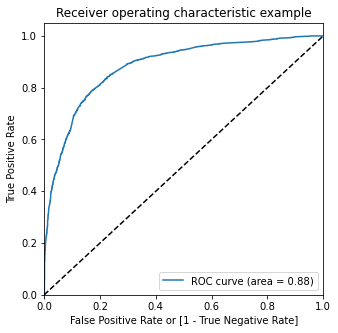

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [89]:
# Finding Optimal Cutoff Point
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.261618,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.244131,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.305166,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.819653,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.130337,3934,0,1,1,0,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.600804  0.969181  0.373813
0.2   0.2  0.747990  0.911598  0.647176
0.3   0.3  0.800866  0.831711  0.781859
0.4   0.4  0.817409  0.763585  0.850575
0.5   0.5  0.817409  0.701135  0.889055
0.6   0.6  0.799011  0.597324  0.923288
0.7   0.7  0.781694  0.515004  0.946027
0.8   0.8  0.761596  0.422547  0.970515
0.9   0.9  0.713049  0.266829  0.988006


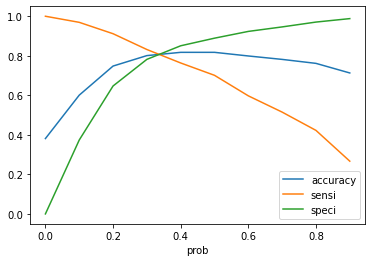

In [91]:
# Ploting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [92]:
# From above Curve we can take 0.35 as Optimal Cutoff Point
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.261618,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.244131,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.305166,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.819653,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.130337,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8107606679035251

In [94]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3286,  716],
       [ 508, 1958]], dtype=int64)

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [96]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7939983779399837

In [97]:
# Let us calculate specificity
TN / float(TN+FP)

0.8210894552723638

In [99]:
# Calculate false postive rate - predicting Converted when Lead is not converted
print(FP/ float(TN+FP))

0.17891054472763618


In [100]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7322363500373972


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8661043753294676


In [102]:
# Precission and Recall

In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3558,  444],
       [ 737, 1729]], dtype=int64)

In [104]:
#Precission= TP/TP+FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.795674183156926

In [105]:
# Recall=TP/TP+FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7011354420113545

In [106]:
# Precission and Recall Tradeoff
from sklearn.metrics import precision_recall_curve

In [107]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

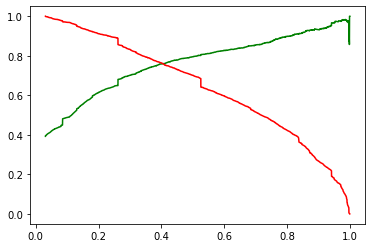

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


# In[114]:


plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [109]:
# Making predictions on the test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4269,-0.298654,0.0,1.320947,0.933036,2.669778,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,0,0,0,0
2376,-0.298654,0.0,-0.961886,-0.900812,-1.130671,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,0,0,0,0
7766,-0.298654,0.0,0.464884,-0.793792,1.244609,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,1,0,0,0,0,1,0
9199,-0.298654,0.0,-0.961886,-0.900812,-1.130671,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,0,0,0,0
4359,-0.298654,0.0,-0.961886,-0.900812,-1.130671,-0.032915,0.0,0.0,0.0,-0.018997,...,0,0,0,0,0,0,0,0,1,0


In [110]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Others Last Activity,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Specialization_Hospitality Management
4269,-0.298654,0.933036,0,0,0,0,0,1,0,0,0,0,0,0
2376,-0.298654,-0.900812,1,0,0,0,0,1,0,0,0,0,0,0
7766,-0.298654,-0.793792,0,0,0,0,0,0,0,1,0,0,1,0
9199,-0.298654,-0.900812,0,1,0,0,0,0,0,0,1,0,0,0
4359,-0.298654,-0.900812,1,0,0,1,0,0,0,0,0,0,0,0


In [111]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)


# In[118]:


y_test_pred[:10]


4269    0.794546
2376    0.955688
7766    0.931806
9199    0.111618
4359    0.873510
9186    0.634405
1631    0.554224
8963    0.217794
8007    0.078517
5324    0.411765
dtype: float64

In [112]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)


# In[120]:


y_pred_1.head()

,0
4269,0.794546
2376,0.955688
7766,0.931806
9199,0.111618
4359,0.873510


In [113]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [114]:
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [115]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [116]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [117]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.794546
1,1,2376,0.955688
2,1,7766,0.931806
3,0,9199,0.111618
4,1,4359,0.873510


In [118]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [119]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [120]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.794546,79,1
1,2376,1,0.955688,96,1
2,7766,1,0.931806,93,1
3,9199,0,0.111618,11,0
4,4359,1,0.873510,87,1


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7968975468975469

In [122]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1316,  361],
       [ 202,  893]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.8155251141552512

In [125]:
# specificity
TN / float(TN+FP)

0.7847346451997614

In [126]:
# Comparing Train and Test Results:

# Train Data

#Accuracy : 81.07%
#Sensitivity : 79.39%
#Specificity : 82.10%

#Test Data:

#Accuracy : 79.68%
#Sensitivity : 81%
#Specificity : 78.47%